### 3-1 데이터 불러오기

In [1]:
# 필요 라이브러리 호출하기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

In [2]:
# 데이터 호출하기
entry_data = pd.read_csv('/aiffel/data/entry_data.csv')
sales_data = pd.read_csv('/aiffel/data/sales_data.csv')
item_data = pd.read_csv('/aiffel/data/item_data.csv')
item_entry_data = pd.read_csv('/aiffel/data/item_entry_data.csv')

In [3]:
# entry_data 데이터 정보 확인하기
entry_data.head()

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


In [4]:
# sales_data 데이터 정보 확인하기
sales_data.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507


In [5]:
# item_data 데이터 정보 확인하기
item_data.head()

,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"


In [6]:
# item_entry_data 데이터 정보 확인하기
item_entry_data.head()

,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"


### 3-2 데이터 분석하기
필수 문제1 : 월별 매출액 추세(sales_data를 이용합니다.)
월별 매출액 추세를 집계하고 그 결과를 시각화해봅니다.
힌트: groupby() 함수를 사용하세요.

In [7]:
# 문제 1: 월별 매출액 추세
# 활용할 데이터(sales_data)를 temp_var로 정의하기
temp_var = sales_data
# temp_var의 date열을 만들고, sales_date의 결제일시 중 앞에서 7번째 값까지 할당
temp_var['date'] = sales_data['결제일시'].apply(lambda x : x[:7])
temp_var

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507,2022-04
...,...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,"-3,500",NaN,2021-02
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,"4,500",NaN,2021-02
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,"-4,500",NaN,2021-02
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,"4,000",NaN,2021-02


In [8]:
temp_var

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507,2022-04
...,...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,"-3,500",NaN,2021-02
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,"4,500",NaN,2021-02
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,"-4,500",NaN,2021-02
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,"4,000",NaN,2021-02


In [9]:
# sales_data의 결제금액에 포함된 쉼표(,) 지우기
temp_var["payment"] = temp_var["결제금액"].apply(lambda x : x.replace(",", ""))

# sales_data의 결제금액을 숫자형태로 바꾸기
temp_var["payment"] = temp_var["payment"].astype(int)

# temp_var의 payment열을 date 기준으로 집계하기
payment_data = temp_var['payment'].groupby(temp_var["date"]).sum()

In [10]:
payment_data

date
2021-02       7000
2021-03    2104500
2021-04    3116600
2021-05    2537000
2021-06    3621500
2021-07    1215000
2021-08    1229000
2021-09    1197500
2021-10    2138500
2021-11    2748500
2021-12    3290000
2022-01    1430500
2022-02    1181500
2022-03    1870900
2022-04      49900
Name: payment, dtype: int64

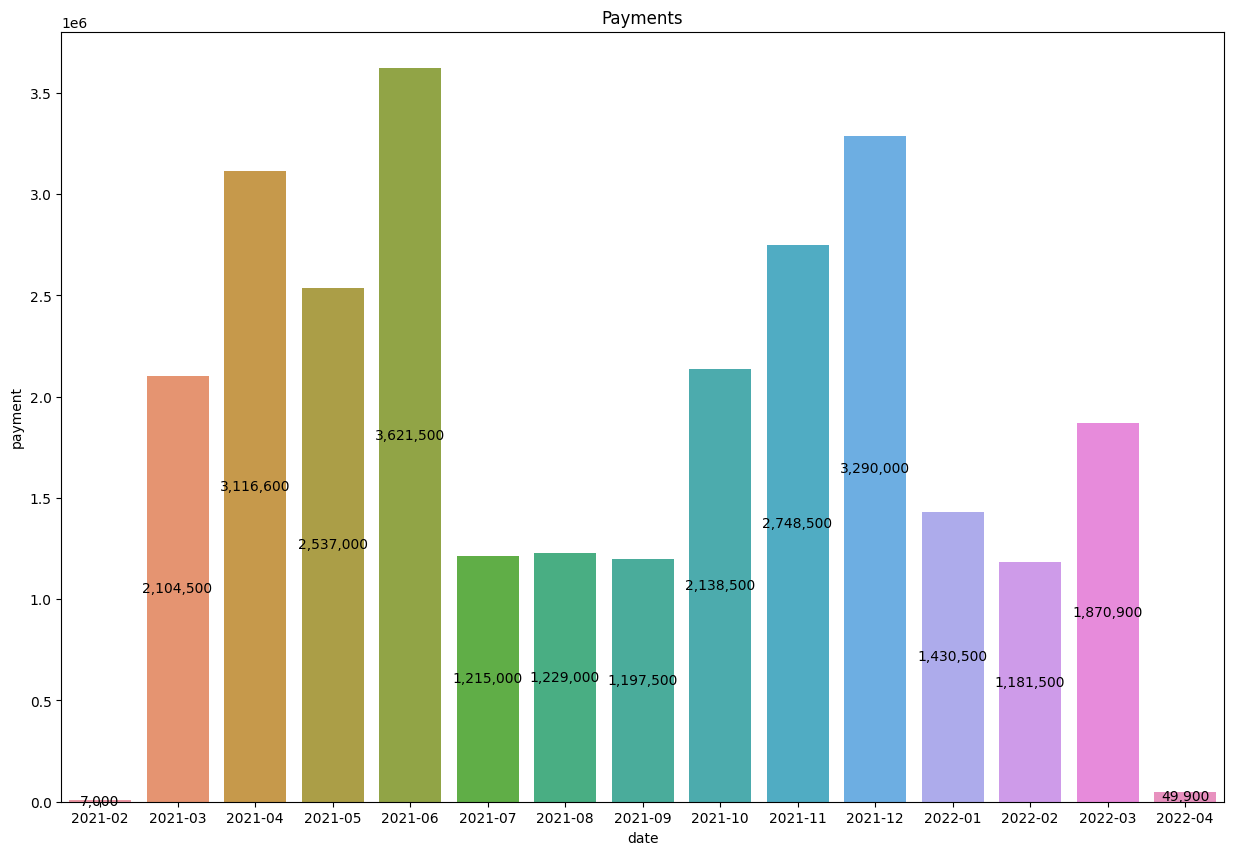

In [11]:
# 집계 결과를 시각화하기
payment_data = payment_data.reset_index()

plt.figure(figsize=(15, 10))
ax = sns.barplot(data=payment_data, x='date', y='payment')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Payments')
plt.show()

필수 문제2: 가장 인기 있는 음식/음료(sales_data를 이용합니다.)
여러 메뉴들(음식,음료)을 판매 개수 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.
힌트: value_counts() 함수를 사용하세요.

In [12]:
# 문제 2: 가장 인기 있는 음식/음료
# temp_var의 상품명을 value_counts를 이용해 집계하기
# 주의! value_counts로 바로 집계하면 판매취소와 결제취소가 함께 집계됩니다.
# 따라서 '판매수량' 칼럼 값이 '-1'인 데이터를 제외하고 집계해야 합니다.

In [13]:
temp_var["판매수량"].unique()

array([ 1, -1])

In [14]:
items_count = temp_var[temp_var["판매수량"]==1]['상품명'].value_counts()

# 집계 결과를 데이터프레임으로 변환하고, 상위 10개 선정하기
items_count = pd.DataFrame(items_count).sort_values(by='상품명', ascending=False)
items_count = items_count.iloc[:10,0]
items_count

김치볶음밥         1204
라면             749
짜장라면           455
치즈불고기볶음밥       420
계란추가           314
낙지볶음밥          312
새우볶음밥          309
아메리카노(ICE)     284
치즈감자튀김         246
감자튀김           242
Name: 상품명, dtype: int64

In [15]:
# 한글이 포함된 시각화를 위해 Matplotlib 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)

'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

In [16]:
items_count = items_count.reset_index()
items_count.columns =['items', 'counts']
items_count

,items,counts
0,김치볶음밥,1204
1,라면,749
2,짜장라면,455
3,치즈불고기볶음밥,420
4,계란추가,314
5,낙지볶음밥,312
6,새우볶음밥,309
7,아메리카노(ICE),284
8,치즈감자튀김,246
9,감자튀김,242


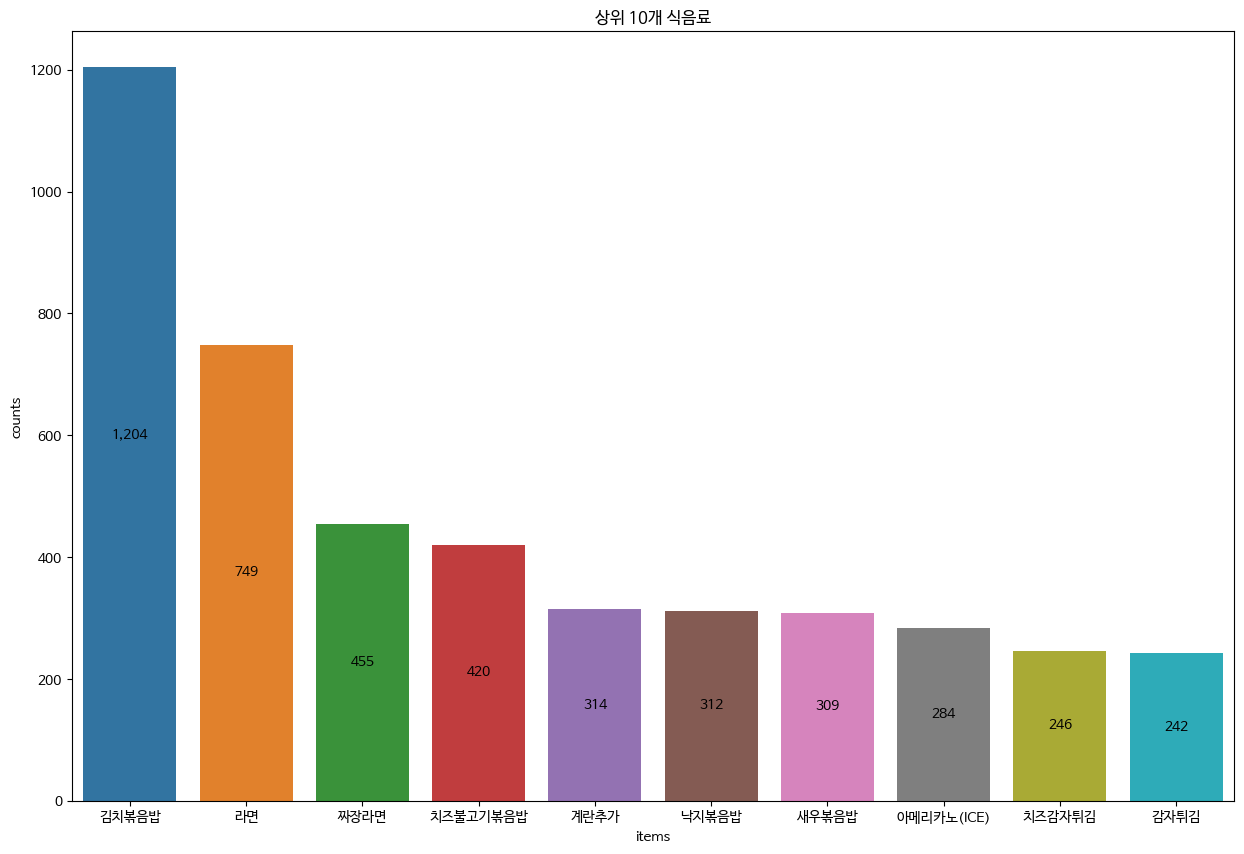

In [17]:
# 집계 결과를 시각화하기
plt.figure(figsize=(15,10))

ax= sns.barplot(data=items_count, x ='items', y='counts')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('상위 10개 식음료')
plt.show()

In [18]:
# 여러 메뉴들(음식,음료)을 판매 매출(판매 개수 x 결제 금액) 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.\
# temp_var의 payment열을 상품명을 기준으로 집계하기
sales = temp_var['payment'].groupby(temp_var['상품명']).sum()

# item_payment의 값을 내림차순으로 정렬하고 상위 10개 도출하기
sales= pd.DataFrame(sales).sort_values(by ='payment',ascending=False).iloc[:10,0]
sales= pd.DataFrame(sales)
sales.reset_index(drop=False, inplace=True)

In [19]:
sales.columns=['items', 'sales']
sales

,items,sales
0,김치볶음밥,5971900
1,라면,2916000
2,치즈불고기볶음밥,2276100
3,짜장라면,2032500
4,낙지볶음밥,1699700
5,새우볶음밥,1529800
6,치즈감자튀김,1348700
7,감자튀김,1083800
8,아메리카노(ICE),936100
9,불닭볶음면,688500


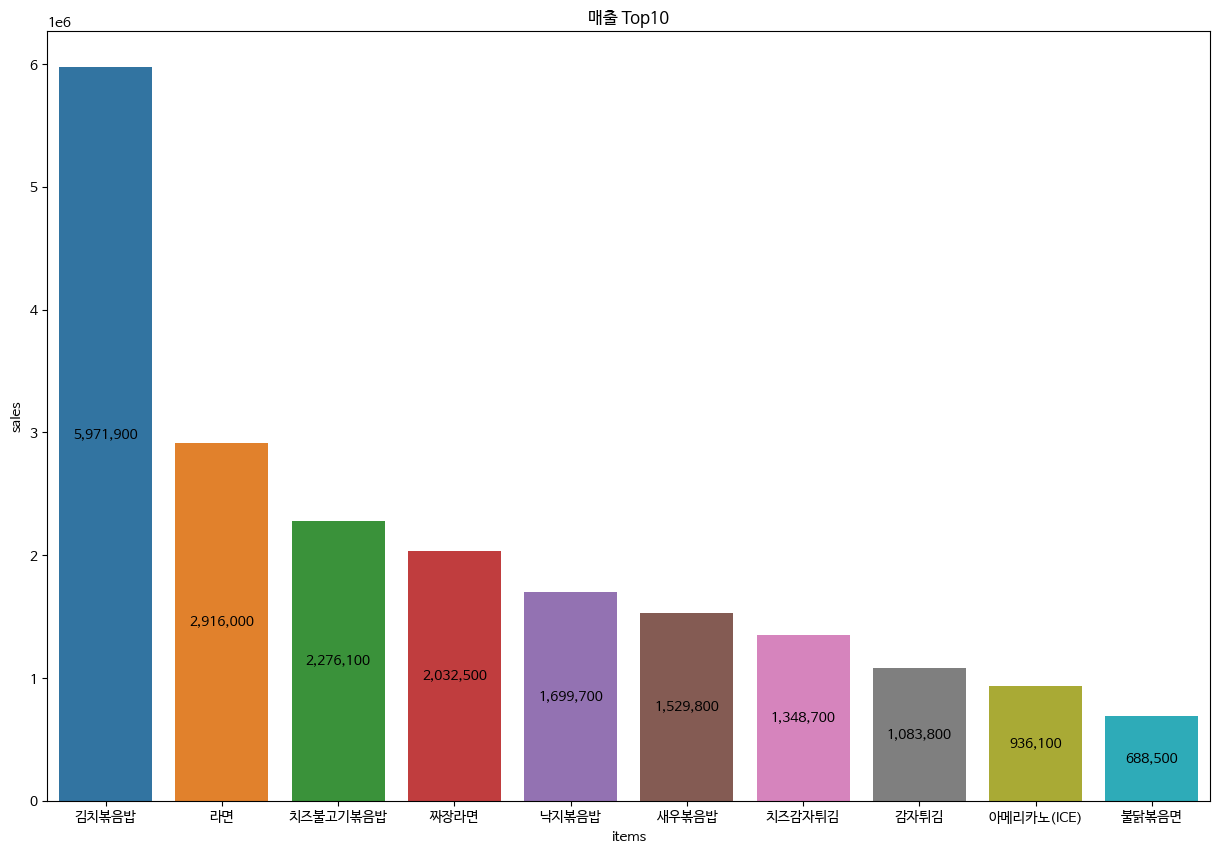

In [20]:
# 집계 결과를 시각화하기
plt.figure(figsize=(15,10))

ax= sns.barplot(data=sales, x ='items', y='sales')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('매출 Top10')
plt.show()

필수 문제3: 가장 많이 팔린 입장권 종류(entry_data를 이용합니다.)
여러 입장권 종류를 판매 매출(판매 개수 x 금액) 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.
힌트: value_counts() 함수를 사용하세요.

In [21]:
entry_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22555 entries, 0 to 22554
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요금제명    22292 non-null  object
 1   입실      22555 non-null  object
 2   퇴실      22555 non-null  object
 3   이용      22533 non-null  object
 4   위치      22555 non-null  object
 5   금액      22555 non-null  int64 
 6   구분      22555 non-null  object
 7   고객      22555 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.4+ MB


In [22]:
# 문제 3: 가장 많이 팔린 입장권 종류
# 활용할 데이터(entry_data)를 temp_var로 정의하기
temp_var = entry_data

# temp_var의 금액을 요금제명을 기준으로 집계하기
tickets = temp_var['금액'].groupby(temp_var['요금제명']).sum()

# tickets의 값을 내림차순으로 정렬하고 상위 10개 도출하기
tickets = pd.DataFrame(tickets).sort_values(by='금액', ascending=False)
tickets_10 = tickets.iloc[:10,0]
tickets_10

요금제명
한국대생 입장권(종일권)      70037000
입장권(종일권)           23570500
심야-조조무제한(06시까지)    11600000
심야-조조무제한            6221000
한국대생 무제한 입장권        5207500
시간요금제(1시간)          2665500
시간요금제(3시간)          2042000
무제한 입장권             1568600
18시이후 무제한           1330500
조조무제한                693000
Name: 금액, dtype: int64

In [23]:
tickets_10 = tickets_10.reset_index()
tickets_10.columns=['tickets', 'sales']
tickets_10

,tickets,sales
0,한국대생 입장권(종일권),70037000
1,입장권(종일권),23570500
2,심야-조조무제한(06시까지),11600000
3,심야-조조무제한,6221000
4,한국대생 무제한 입장권,5207500
5,시간요금제(1시간),2665500
6,시간요금제(3시간),2042000
7,무제한 입장권,1568600
8,18시이후 무제한,1330500
9,조조무제한,693000


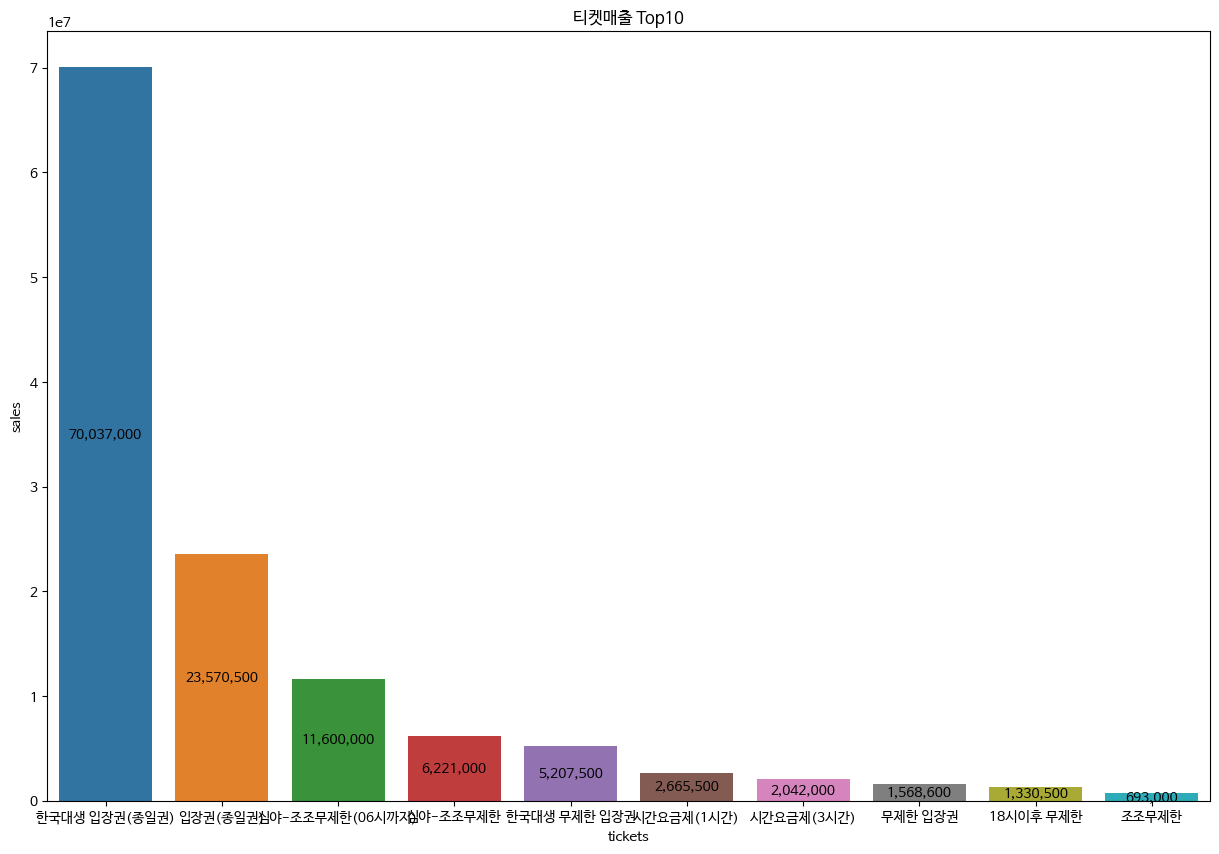

In [24]:
# 집계 결과를 시각화하기
plt.figure(figsize=(15,10))

ax= sns.barplot(data=tickets_10, x ='tickets', y='sales')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('티켓매출 Top10')
plt.show()

### 계절별 인기 식음료 특가 세일을 통한 고객 확보

In [25]:
temp_var2 = sales_data
# temp_var의 month열을 만들고, date에서 월에 해당하는 값 할당
temp_var2['month'] = sales_data['date'].apply(lambda x : x[5:])

# 각 월에 판매된 상품과 판매수량 집계
items_count = temp_var2[temp_var2["판매수량"]==1].groupby(temp_var2['month'])['상품명'].value_counts()
items_count = pd.DataFrame(items_count)
items_count.columns = ['counts']
items_count.reset_index(inplace=True)
items_count

,month,상품명,counts
0,01,라면,46
1,01,김치볶음밥,39
2,01,짜장라면,24
3,01,소떡소떡,15
4,01,치즈불고기볶음밥,14
...,...,...,...
646,12,카모마일(ICE),1
647,12,카페라떼(HOT),1
648,12,카페라떼(ICE),1
649,12,쿠앤크쉐이크,1


In [27]:
# 봄 인기상품 확인
month_list = ['03','04','05']
spring = items_count[items_count['month'].isin(month_list)].reset_index(drop=True)
spring = pd.DataFrame(spring).sort_values(by='counts', ascending=False)
spring.reset_index(drop=True, inplace=True)

# Top 10 상품 확인
spring_10 = spring.iloc[:10,:]
spring_10

,month,상품명,counts
0,04,김치볶음밥,164
1,03,김치볶음밥,147
2,05,김치볶음밥,127
3,04,2인라면,94
4,03,라면,82
5,05,라면,74
6,04,치즈불고기볶음밥,70
7,03,짜장라면,69
8,04,라면,68
9,03,아메리카노(ICE),48


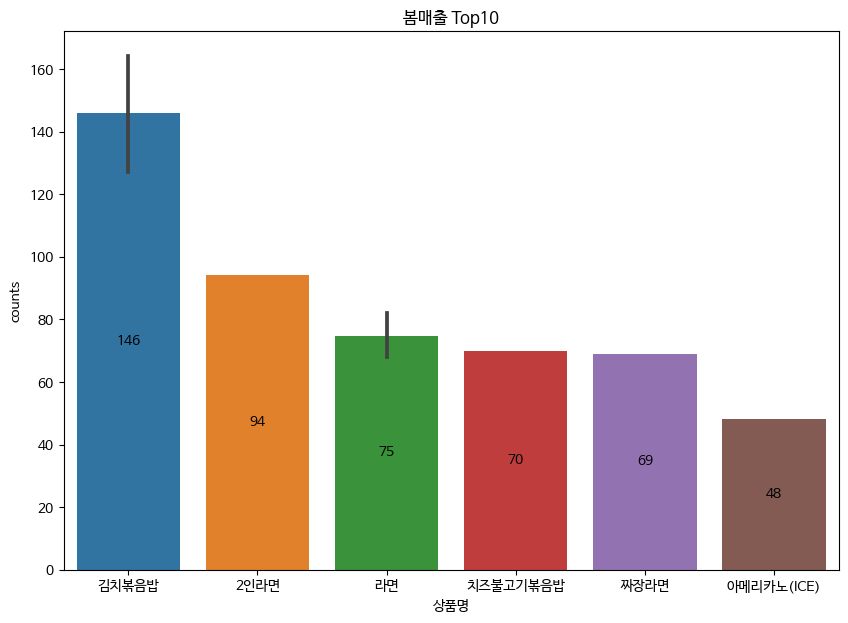

In [32]:
# 집계 결과를 시각화하기
plt.figure(figsize=(10,7))

ax= sns.barplot(data=spring_10, x ='상품명', y='counts')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('봄매출 Top10')
plt.show()

In [28]:
# 여름 인기상품 확인
month_list = ['06','07','08']
summer = items_count[items_count['month'].isin(month_list)].reset_index(drop=True)
summer = pd.DataFrame(summer).sort_values(by='counts', ascending=False)
summer.reset_index(drop=True, inplace=True)

# Top 10 상품 확인
summer_10 = summer.iloc[:10,:]
summer_10

,month,상품명,counts
0,06,김치볶음밥,185
1,06,치즈불고기볶음밥,91
2,06,라면,90
3,06,계란추가,70
4,06,짜장라면,61
5,06,아메리카노(ICE),49
6,07,김치볶음밥,47
7,08,김치볶음밥,46
8,06,낙지볶음밥,45
9,06,새우볶음밥,44


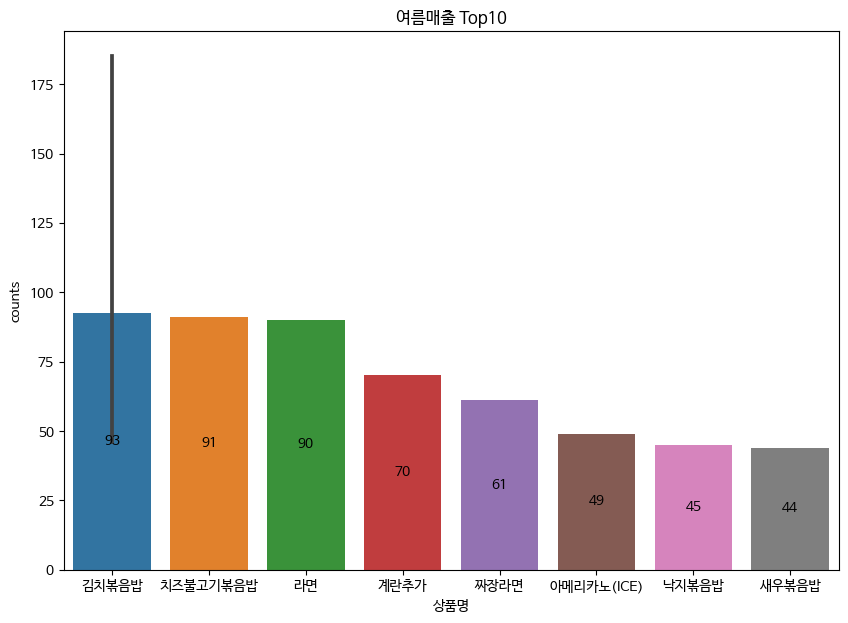

In [33]:
# 집계 결과를 시각화하기
plt.figure(figsize=(10,7))

ax= sns.barplot(data=summer_10, x ='상품명', y='counts')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('여름매출 Top10')
plt.show()

In [29]:
# 가을 인기상품 확인
month_list = ['09','10','11']
fall = items_count[items_count['month'].isin(month_list)].reset_index(drop=True)
fall = pd.DataFrame(fall).sort_values(by='counts', ascending=False)
fall.reset_index(drop=True, inplace=True)

# Top 10 상품 확인
fall_10 = fall.iloc[:10,:]
fall_10

,month,상품명,counts
0,11,김치볶음밥,140
1,10,김치볶음밥,106
2,11,라면,83
3,10,라면,64
4,11,짜장라면,45
5,09,라면,45
6,09,김치볶음밥,44
7,11,치즈감자튀김,41
8,11,치즈불고기볶음밥,40
9,10,짜장라면,35


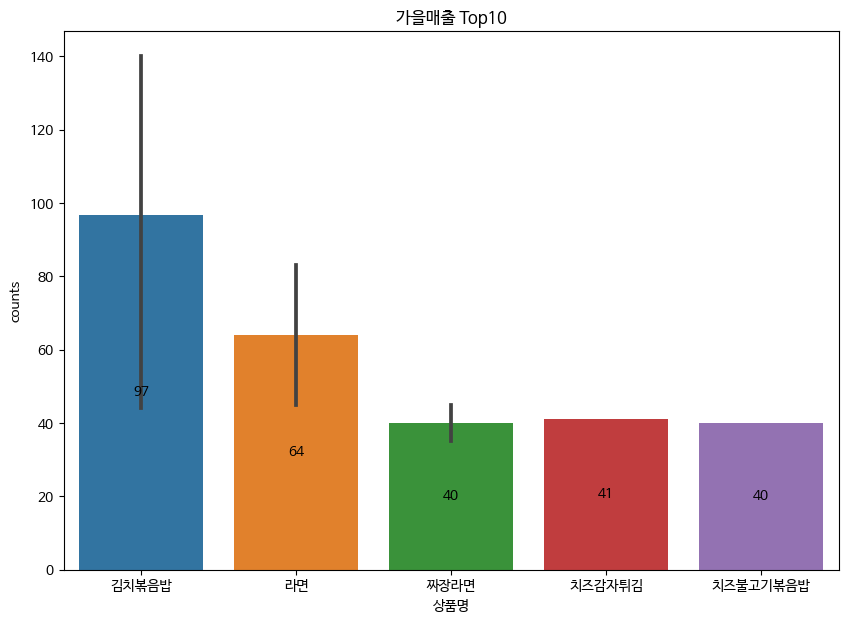

In [34]:
# 집계 결과를 시각화하기
plt.figure(figsize=(10,7))

ax= sns.barplot(data=fall_10, x ='상품명', y='counts')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('가을매출 Top10')
plt.show()

In [30]:
# 겨울 인기상품 확인
month_list = ['12','01','02']
winter = items_count[items_count['month'].isin(month_list)].reset_index(drop=True)
winter = pd.DataFrame(winter).sort_values(by='counts', ascending=False)
winter.reset_index(drop=True, inplace=True)

# Top 10 상품 확인
winter_10 = winter.iloc[:10,:]
winter_10

,month,상품명,counts
0,12,김치볶음밥,132
1,12,라면,103
2,12,짜장라면,55
3,12,낙지볶음밥,47
4,01,라면,46
5,12,치즈불고기볶음밥,44
6,12,계란추가,43
7,12,아메리카노(ICE),41
8,12,치즈감자튀김,41
9,01,김치볶음밥,39


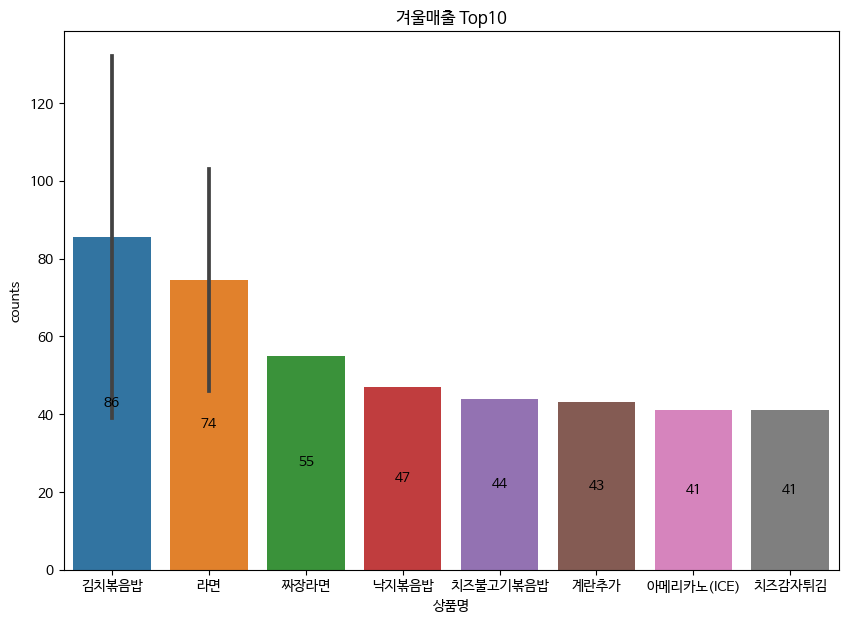

In [35]:
# 집계 결과를 시각화하기
plt.figure(figsize=(10,7))

ax= sns.barplot(data=winter_10, x ='상품명', y='counts')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('겨울매출 Top10')
plt.show()

계졀과 무관하게 김치볶음밥을 가장 많이 사먹는다. 김치볶음밥과 음료를 세트로 묶어서 팔면 고객 만족도와 상품 판매 다양성을 높일 수 있을 것 같다.